# import

In [1]:
from Utilities.utils import *

# figure B

Text(0.5, 1.0, 'Expert vs learning')

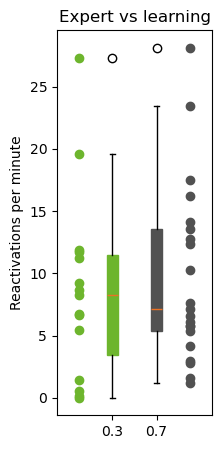

In [2]:
with open(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\Replay_plots_remade\expert\\" + "processed_replay_data.pkl", 'rb') as f:
    expert_master = pickle.load(f)
    
with open(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\Replay_plots_remade\learning\\" + "processed_replay_data.pkl", 'rb') as f:
    learning_master = pickle.load(f)
    
    
expert_reactivations_per_min = expert_master['reactivations_per_min']
learning_reactivations_per_min = learning_master['reactivations_per_min']

# replace nan values with 0
expert_reactivations_per_min = [0 if np.isnan(item) else item for item in expert_reactivations_per_min]
learning_reactivations_per_min = [0 if np.isnan(item) else item for item in learning_reactivations_per_min]


########################################

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.ones(len(expert_reactivations_per_min)), expert_reactivations_per_min, 'o', color = '#515151')
ax.boxplot(expert_reactivations_per_min, positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#515151', color='#515151'), medianprops=dict(color='#EB7224'))

ax.plot(np.zeros(len(learning_reactivations_per_min)), learning_reactivations_per_min, 'o', color = '#6DB52D')
ax.boxplot(learning_reactivations_per_min, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#6DB52D', color='#6DB52D'), medianprops=dict(color='#EB7224'))

ax.set_ylabel('Reactivations per minute')

ax.set_title('Expert vs learning')



# figure C

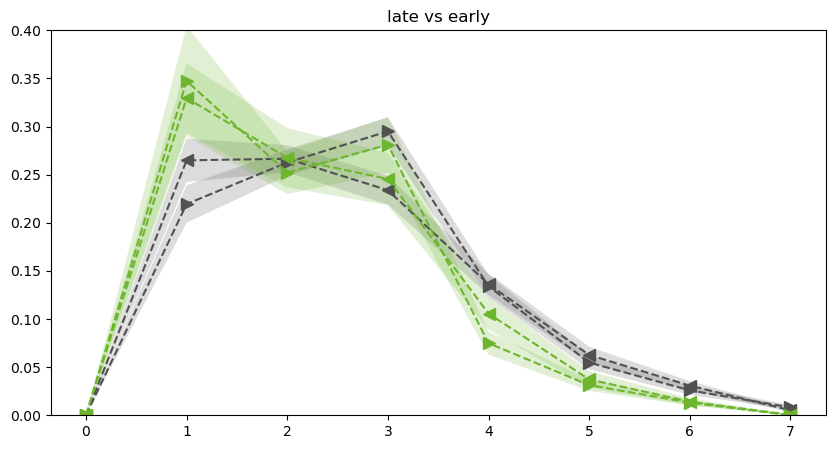

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      28
number of groups                  2
test statistic             0.343782
p-value                    0.742626
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.60397
-----------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      70
number of groups                  2
test statistic             5.646559
p-value                      0.0041
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.64602
Significant feature-wise pairwise PERMANOVA results (α=0.05):
Feature 1: control vs test
  statistic = 8.6499, p (corr.) = 0.0232 *, R2: 0.4629
---
Feature 4: control vs test
  statistic = 11.8730, p (corr.) = 0.0152 *, R2: 0.5320
---
Feature 5: control vs test
  statistic = 9.3507, p (corr.) = 0.0296 *, R2: 0.5558
---
Feature 6: 

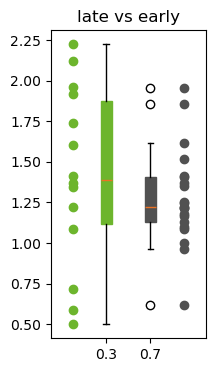

Test statistic: 2.7941707260245114
P-value: 0.01519834383611054
ShapiroResult(statistic=np.float64(0.9482890816718307), pvalue=np.float64(0.31607121231820307))
ShapiroResult(statistic=np.float64(0.9531432047821607), pvalue=np.float64(0.610483741587827))
TtestResult(statistic=np.float64(0.9352717256365966), pvalue=np.float64(0.35644233473049425), df=np.float64(33.0))
{'cohens_d': np.float64(0.3226994032442534)}


In [3]:

bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]

f_warp_factors, r_warp_factors, forward_total, reverse_total = extract_mean_warps(pd.DataFrame(expert_master['regression']), bins_)
learning_f_warp_factors, learning_r_warp_factors,  learning_forward_total, learning_reverse_total= extract_mean_warps(pd.DataFrame(learning_master['regression']), bins_)

# plot distributions
fig,ax = plt.subplots(1, 1,figsize=(10, 5))
color_ = '#515151'
plot_warp_factors(ax, f_warp_factors, r_warp_factors, bins_, color_)
ax.set_title('late vs early')
color_ = '#6DB52D'
plot_warp_factors(ax, learning_f_warp_factors, learning_r_warp_factors, bins_, color_)
ax.set_title('late vs early')
plt.show()

### STATS
# forward vs reverse for early learning
permanova_forward_vs_reverse(learning_f_warp_factors, learning_r_warp_factors)
print('-----------------')
# PERMANOVA late vs early diff
el_grouping = group_difference_permanova(f_warp_factors, r_warp_factors, learning_f_warp_factors, learning_r_warp_factors)
# PAIRWISE PERMANOVA
# late vs early learning
# Combine:
combined_data = np.vstack([
    np.asarray(f_warp_factors),
    np.asarray(r_warp_factors),
    np.asarray(learning_f_warp_factors),
    np.asarray(learning_r_warp_factors)
])
combined_labels = np.array(el_grouping)
feature_results = pairwise_permanova_by_feature(
    combined_data,
    combined_labels,
    method='bonferroni',
    permutations=10000)
print("Significant feature-wise pairwise PERMANOVA results (α=0.05):")
for res in feature_results:
    p = res["p_value"]
    if p < 0.05:
        stars = '***' if p < 0.001 else '**' if p < 0.01 else '*'
        print(f"Feature {res['feature']}: {res['group1']} vs {res['group2']}")
        print(f"  statistic = {res['test_stat']:.4f}, p (corr.) = {p:.4g} {stars}, R2: {res['R2']:.4f}")
        print("---")
        
        
################################### INSET

# plot inset
fig, ax = plt.subplots(figsize=(2, 4))
proportion_forward_v_reverse = np.array(forward_total)/np.array(reverse_total)
ax.plot(np.ones(len(proportion_forward_v_reverse)),proportion_forward_v_reverse,'o', color = '#515151')
ax.boxplot([x for x in proportion_forward_v_reverse if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#515151', color='#515151'), medianprops=dict(color='#EB7224'))
learning_proportion_forward_v_reverse = np.array(learning_forward_total)/np.array(learning_reverse_total)
ax.plot(np.zeros(len(learning_proportion_forward_v_reverse)),learning_proportion_forward_v_reverse,'o', color = '#6DB52D')
ax.boxplot([x for x in learning_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#6DB52D', color='#6DB52D'), medianprops=dict(color='#EB7224'))
ax.set_title('late vs early')
plt.show()

## STATS
# Perform one-sample t-test
statistic, p_value = ttest_1samp(learning_proportion_forward_v_reverse, 1.0)
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
effect_size(x=learning_proportion_forward_v_reverse,test='one_sample_ttest',popmean = 1)

# early vs late difference:
print(scipy.stats.shapiro(proportion_forward_v_reverse))
print(scipy.stats.shapiro(learning_proportion_forward_v_reverse))
## all normal so use ind t test
print(scipy.stats.ttest_ind(learning_proportion_forward_v_reverse,proportion_forward_v_reverse))
print(effect_size(x=learning_proportion_forward_v_reverse, y=proportion_forward_v_reverse, test='ttest'))


# figure D

Text(0, 0.5, 'Reactivations event lengths (s)')

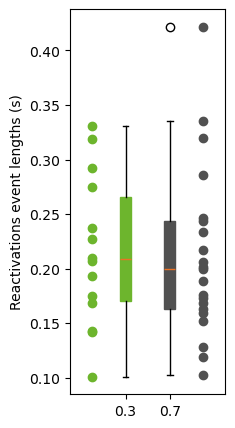

In [4]:
expert_event_lens = expert_master['event_lens']
learning_event_lens = learning_master['event_lens']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.ones(len(expert_event_lens)), expert_event_lens, 'o', color = '#515151')
ax.boxplot(expert_event_lens, positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#515151', color='#515151'), medianprops=dict(color='#EB7224'))

ax.plot(np.zeros(len(learning_event_lens)), learning_event_lens, 'o', color = '#6DB52D')
ax.boxplot([x for x in learning_event_lens if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#6DB52D', color='#6DB52D'), medianprops=dict(color='#EB7224'))

ax.set_ylabel('Reactivations event lengths (s)')


# figure E

PLOT 2:
Group 1 (NREM):
model p value (f statistic) = 
3.1712640703044366e-09
r2 = 
0.6071427149335138
Group 2 (REM):
model p value (f statistic) = 
9.576838279216117e-07
r2 = 
0.7451712335388596
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     52.64
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           9.58e-07
Time:                        13:46:37   Log-Likelihood:                 21.443
No. Observations:                  20   AIC:                            -38.89
Df Residuals:                      18   BIC:                            -36.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
              

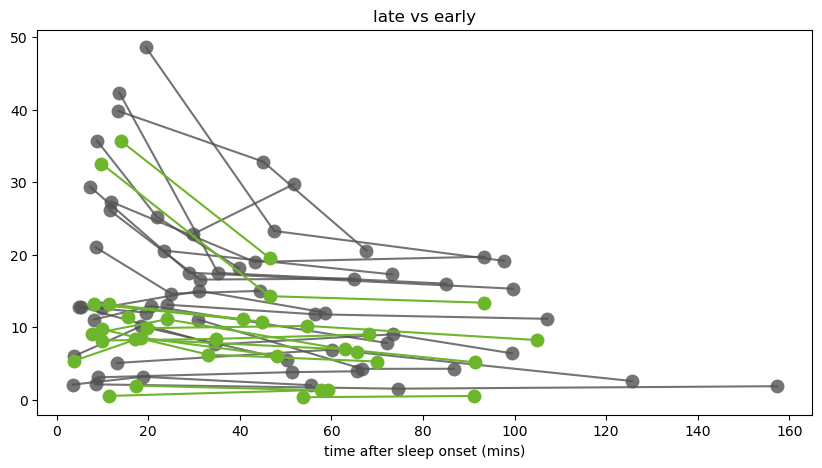

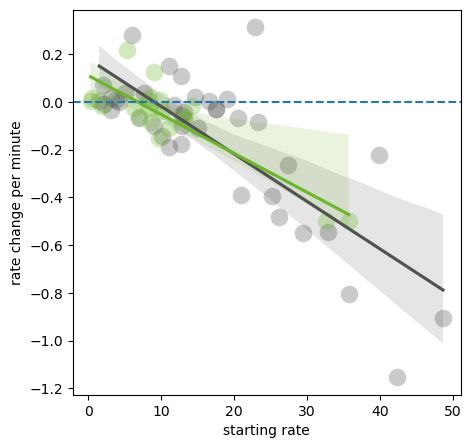

In [5]:
group1_data, group2_data = plot_decay(expert_master['binned_rate']  ,expert_master['bins_relative_so'],learning_master['binned_rate']  ,learning_master['bins_relative_so'], '#515151','#6DB52D','late vs early')

###################### STATS
df1 = pd.DataFrame(group1_data)
df2 = pd.DataFrame(group2_data)
# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()
model_group2 = sm.OLS.from_formula('y ~ x', data=df2).fit()

print('PLOT 2:')
# Print the summary of each model
print("Group 1 (NREM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)

print("Group 2 (REM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group2.f_pvalue)
print('r2 = ')
print(model_group2.rsquared)

### STATS 
# ### effect of decay - significance

# Add a constant term to the independent variable
data = sm.add_constant(df2)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()
# Print the summary statistics
print(model.summary())
r = np.sign(model.params['x']) * np.sqrt(model.rsquared)
print(r)
print(model.rsquared)
print(model.pvalues['x'])

### between groups
# Combine the data into one DataFrame
data = pd.concat([df1, df2], axis=0)
# Create a grouping variable
groups = np.array(['nrem'] * len(df1) + ['rem'] * len(df2))
# Perform MANOVA
manova = MANOVA.from_formula('x + y ~ groups', data=data)
# Print the MANOVA results
print(manova.mv_test())
# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)



# figure F

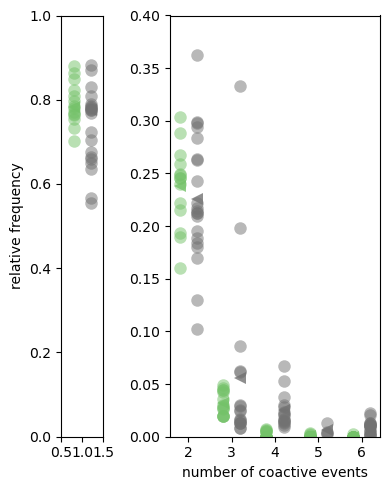

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      35
number of groups                  2
test statistic             2.318469
p-value                    0.085891
number of permutations        10000
Name: PERMANOVA results, dtype: object
***************************************************
PERMANOVA effect size R²: 0.62969


In [6]:

# ---------- data ----------
e_counts = collapse(expert_master['coactive_freqs'])
l_counts = collapse(learning_master['coactive_freqs'])

colors = {"expert": "#727272", "learning": "#74C269"}
offset = 0.2

# ---------- figure ----------
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(4, 5),
    gridspec_kw={'width_ratios': [2, 10]}
)

# left panel: coactive = 1 (median)
for counts, color, off in [
    (e_counts, colors["expert"], offset),
    (l_counts, colors["learning"], -offset)
]:
    plot_group(ax1, counts, ['1'], off, color, np.median)

ax1.set_xlim(0.5, 1.5)
ax1.set_ylim(0, 1)
ax1.set_ylabel('relative frequency')

# right panel: coactive >= 2 (mean)
keys = sorted([k for k in e_counts if k != '1'], key=float)
for counts, color, off in [
    (e_counts, colors["expert"], offset),
    (l_counts, colors["learning"], -offset)
]:
    plot_group(ax2, counts, keys, off, color, np.mean)

ax2.set_xlabel('number of coactive events')
ax2.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()

### STATS
permanova_coactive_freqs(expert_master['coactive_freqs'], learning_master['coactive_freqs'])


# figure G

--- x-axis ---
 Shapiro–Wilk:    W=0.962, p=0.000 -> non-normal
 D’Agostino K²: K²=950.775, p=0.000 -> non-normal

--- y-axis ---
 Shapiro–Wilk:    W=0.963, p=0.000 -> non-normal
 D’Agostino K²: K²=2709.202, p=0.000 -> non-normal

------------------ expert only regression ------------------------------------------
r = 0.633822824300782
r^2 = 0.4017313726046199
p-value = 0.0
------------------------------------------------------------
--- x-axis ---
 Shapiro–Wilk:    W=0.980, p=0.000 -> non-normal
 D’Agostino K²: K²=252.656, p=0.000 -> non-normal

--- y-axis ---
 Shapiro–Wilk:    W=0.970, p=0.000 -> non-normal
 D’Agostino K²: K²=1234.269, p=0.000 -> non-normal

data isnt normal so permanova for forward late vs early


c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_6\Utilities\utils.py:864: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('bin')['x'].mean()
c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_6\Utilities\utils.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_std = df.groupby('bin')['x'].std()
c:\miniconda\envs\proc_replay_2025\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6727.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Emmett Tho

***************************************************
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      28
number of groups                  2
test statistic             0.067644
p-value                       0.783
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA pseudo-F: 0.06764
PERMANOVA p-value: 0.78300
PERMANOVA effect size R²: 0.66216


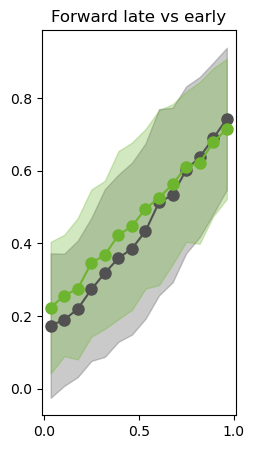

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(2.5, 5))
x = expert_master['neuron_rel_forward_replay_positions']
x = [item for sublist in x for item in sublist]
y = expert_master['neuron_rel_awake_positions_forwards']
y = [item for sublist in y for item in sublist]
a,b = plot_sleep_awake_spike_position(ax,x,y, '#515151')
test_univariate_normality(x, y, alpha=0.05)


print('------------------ expert only regression ------------------------------------------')
import statsmodels.api as sm
group1_data = {'x': x, 'y': y}
# SaveFig(title_+'decay_regression.pdf',r'C:\Users\Emmett Thompson\Documents\plots\\')
df1 = pd.DataFrame(group1_data)
# Add a constant term to the independent variable
data = sm.add_constant(df1)
# data = sm.add_constant(df2)

# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()

# Print the summary statistics
# print(model.summary())

r = np.sign(model.params['x']) * np.sqrt(model.rsquared)


print(f"r = {r}")
print(f"r^2 = {model.rsquared}")
print(f"p-value = {model.pvalues['x']}")


print('------------------------------------------------------------')


x1 = learning_master['neuron_rel_forward_replay_positions']
x1 = [item for sublist in x1 for item in sublist]
y1 = learning_master['neuron_rel_awake_positions_forwards']
y1 = [item for sublist in y1 for item in sublist]
c,d= plot_sleep_awake_spike_position(ax,x1,y1, '#6DB52F')
test_univariate_normality(x1, y1, alpha=0.05)

ax.set_title('Forward late vs early')
print('data isnt normal so permanova for forward late vs early')

print_permanova_for_awake_sleep_neuron_positions(a,b,c,d)


# figure H

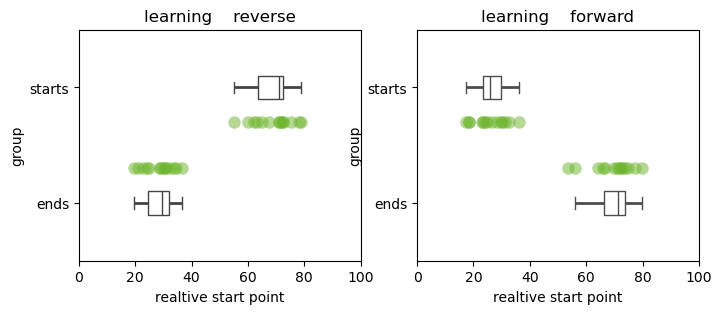

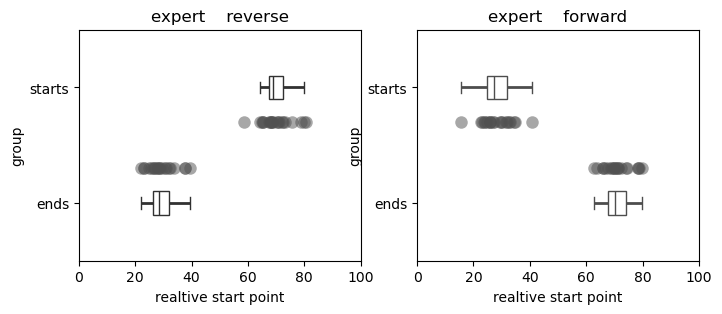

ShapiroResult(statistic=np.float64(0.9754605626019955), pvalue=np.float64(0.8480745849657958))
ShapiroResult(statistic=np.float64(0.9519369820631697), pvalue=np.float64(0.3703914541583487))
ShapiroResult(statistic=np.float64(0.9594133004721429), pvalue=np.float64(0.5043848873596806))
ShapiroResult(statistic=np.float64(0.9470380016996118), pvalue=np.float64(0.29908190783052324))
ShapiroResult(statistic=np.float64(0.9637848813734085), pvalue=np.float64(0.784581420635664))
ShapiroResult(statistic=np.float64(0.9202547156339049), pvalue=np.float64(0.22175810766571513))
ShapiroResult(statistic=np.float64(0.9576300556048714), pvalue=np.float64(0.6839399296094383))
ShapiroResult(statistic=np.float64(0.9608955185850074), pvalue=np.float64(0.7378204254888282))
_____________________________________________________________________________________________
                  Multivariate linear model
                                                              
--------------------------------------

In [8]:
fig,[ax,ax2] = plt.subplots(1, 2,figsize=(8, 3))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(learning_master['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'learning','#6DB52D')
    
fig,[ax,ax2] = plt.subplots(1, 2,figsize=(8, 3)) 
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(expert_master['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'expert','#515151')

plt.show()

### STATS
expert_all_chunk_reverse_start_mean, expert_all_chunk_forward_start_mean, expert_all_chunk_reverse_end_mean, expert_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(expert_master['start_end']))
learning_all_chunk_reverse_start_mean, learning_all_chunk_forward_start_mean, learning_all_chunk_reverse_end_mean, learning_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(learning_master['start_end']))

group1 = [x for x in expert_all_chunk_forward_start_mean if not np.isnan(x)] 
group2 = [x for x in expert_all_chunk_forward_end_mean if not np.isnan(x)] 
group3 = [x for x in expert_all_chunk_reverse_start_mean if not np.isnan(x)] 
group4 = [x for x in expert_all_chunk_reverse_end_mean if not np.isnan(x)] 
group5 = [x for x in learning_all_chunk_forward_start_mean if not np.isnan(x)] 
group6 = [x for x in learning_all_chunk_forward_end_mean if not np.isnan(x)] 
group7 = [x for x in learning_all_chunk_reverse_start_mean if not np.isnan(x)] 
group8 = [x for x in learning_all_chunk_reverse_end_mean if not np.isnan(x)] 
for group in [group1, group2, group3, group4, group5, group6, group7, group8]:
    print(scipy.stats.shapiro(group))

## all are normal so use MANOVA

df_late = pd.DataFrame({
    'group':       ['late'] * len(expert_all_chunk_forward_start_mean),
    'forward_start': expert_all_chunk_forward_start_mean,
    'forward_end':   expert_all_chunk_forward_end_mean,
    'reverse_start': expert_all_chunk_reverse_start_mean,
    'reverse_end':   expert_all_chunk_reverse_end_mean,
})
df_early = pd.DataFrame({
    'group':       ['early'] * len(learning_all_chunk_forward_start_mean),
    'forward_start': learning_all_chunk_forward_start_mean,
    'forward_end':   learning_all_chunk_forward_end_mean,
    'reverse_start': learning_all_chunk_reverse_start_mean,
    'reverse_end':   learning_all_chunk_reverse_end_mean,
})
print('_____________________________________________________________________________________________')
# Concatenate them:
df = pd.concat([df_late, df_early], ignore_index=True)
#  MANOVA
manova = MANOVA.from_formula('forward_start + forward_end +reverse_start +reverse_end  ~ group', data=df)
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)




# figure I

------------------


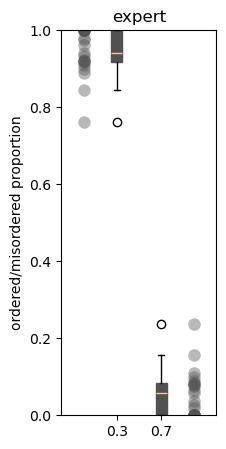

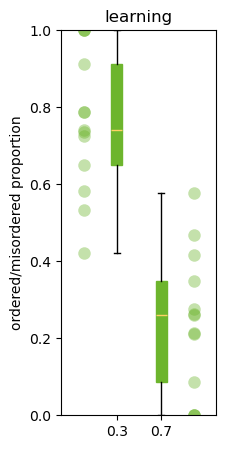

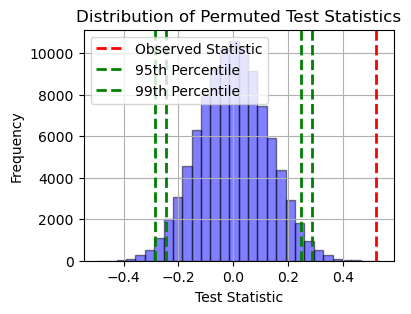

- p-value: 1e-05
- 99th percentile of permuted statistics: 0.28859899259899224
- Observed Test Statistic: 0.5198639917680165
cohens d = 2.8145362289994527
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      34
number of groups                  2
test statistic            17.509105
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.40118
---------------------------------------------------


In [9]:
# plot
plot_ordered_misrodered(expert_master['ordered_misordered'],'expert','ordered/misordered proportion', '#515151')
plot_ordered_misrodered(learning_master['ordered_misordered'],'learning','ordered/misordered proportion','#6DB52D')

# STATS
print('------------------')
list1 = [float(item[0]) for item in learning_master['ordered_misordered']] 
list2 = [float(item[1]) for item in learning_master['ordered_misordered']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

## permanova - between groups
permanova_ordered_misordered(expert_master['ordered_misordered'], learning_master['ordered_misordered'])
print('---------------------------------------------------')

# figure J

------------------


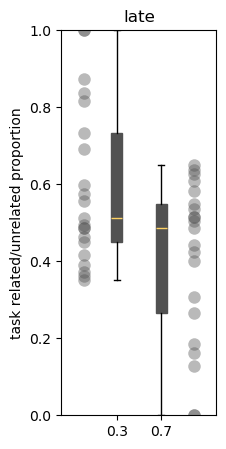

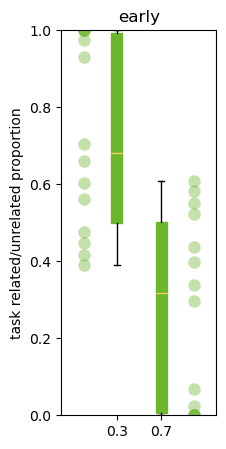

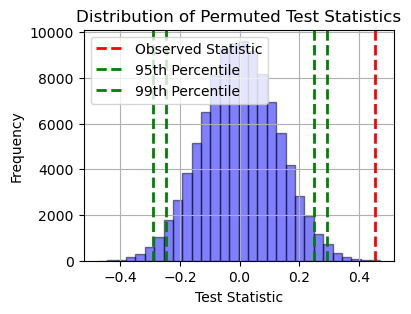

- p-value: 6e-05
- 99th percentile of permuted statistics: 0.2926674654534031
- Observed Test Statistic: 0.4530091076439036
cohens d = 1.8292287120721011
---------------------------------------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      35
number of groups                  2
test statistic             2.943737
p-value                       0.095
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.56526


In [10]:
plot_ordered_misrodered(expert_master['task_nontask'],'late','task related/unrelated proportion','#515151')
plot_ordered_misrodered(learning_master['task_nontask'],'early','task related/unrelated proportion','#6DB52D')

print('------------------')
list1 = [float(item[0]) for item in learning_master['task_nontask']] 
list2 = [float(item[1]) for item in learning_master['task_nontask']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')

## permanova - between groups
print('---------------------------------------------------')
permanova_ordered_misordered(expert_master['task_nontask'], learning_master['task_nontask'])


# figure K 

Fitted parameters: a = 0.03267556939789752, b = 3.21309210901926
R-squared: 0.9926259080124209
p-values: [np.float64(1.7030314393595702e-05), np.float64(1.1325253623795106e-08)]
Fitted parameters: a = 0.03879925261082293, b = 2.9611667306890963
R-squared: 0.9856101675654492
p-values: [np.float64(9.026715185722622e-05), np.float64(1.452690605585616e-07)]
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3415 2.0000 17.0000 16.3933 0.0001
         Pillai's trace 0.6585 2.0000 17.0000 16.3933 0.0001
 Hotelling-Lawley trace 1.9286 2.0000 17.0000 16.3933 0.0001
    Roy's greatest root 1.9286 2.0000 17.0000 16.3933 0.0001
------------------------------------------------------------
                                                    

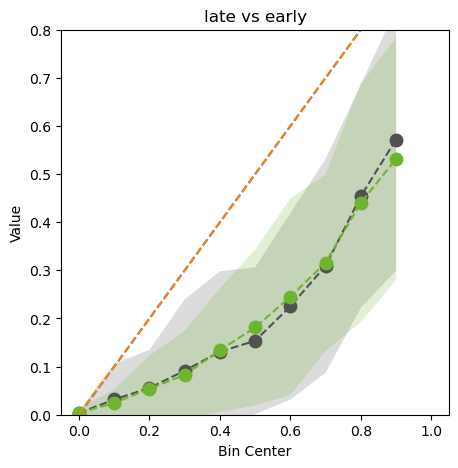

In [11]:
fig, ax = plt.subplots(1, 1,figsize=(5, 5))
late_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(expert_master['awake_seqbyseq_neuron_involvements'],expert_master['sleep_seqbyseq_neuron_involvements'])
early_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(learning_master['awake_seqbyseq_neuron_involvements'],learning_master['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(late_awake_sleep_relationship,'#515151',ax)
plot_awake_sleep_relationship(early_awake_sleep_relationship,'#6DB52D',ax)
ax.set_title('late vs early')

m = manova_groups_neuron_involvement(late_awake_sleep_relationship,early_awake_sleep_relationship)
# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(m)
print("Partial eta-squared for each effect:", eta_squared)


